This notebook will be primarily used for Coursera's IBM Data Science Capstone Project.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn import svm

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
#read dataset and prepare it
df = pd.read_csv('Data-Collisions.csv')
print(df.dtypes)
df.head()

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

C:\Users\cpche\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#What are the different values of SEVERITYCODE?
df.SEVERITYCODE.unique()
#only 2 values, strange.

array([2, 1], dtype=int64)

In [5]:
df1 = df[['SEVERITYCODE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']]

#UNDERINFL is not formatted well, as it contains the values N, 0, 1, and NaN, so let's drop it
df1.drop('UNDERINFL', axis = 1, inplace=True)

df1.head(50)

C:\Users\cpche\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEVERITYCODE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN
5,1,At Intersection (intersection related),NaN,Clear,Dry,Daylight,NaN
6,1,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN
7,2,At Intersection (intersection related),NaN,Clear,Dry,Daylight,NaN
8,1,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
9,2,At Intersection (intersection related),NaN,Clear,Dry,Daylight,NaN


In [6]:
#INATTENTIONIND and SPEEDING have NaN instead of N.
df1['INATTENTIONIND'] = df1['INATTENTIONIND'].replace(np.nan, "N")
df1[['SPEEDING']] = df1[['SPEEDING']].replace(np.nan, "N")
df1.head()

C:\Users\cpche\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cpche\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,SEVERITYCODE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,Mid-Block (not related to intersection),N,Raining,Wet,Dark - Street Lights On,N
2,1,Mid-Block (not related to intersection),N,Overcast,Dry,Daylight,N
3,1,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,At Intersection (intersection related),N,Raining,Wet,Daylight,N


In [7]:
#continue to clean the data
dfClean = df1.replace('Unknown', np.nan) #replace unknown with NaN as that's the same thing
dfClean.dropna(inplace = True) #some rows still have NaN values, so lets drop them
dfClean.head(50)

,SEVERITYCODE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,Mid-Block (not related to intersection),N,Raining,Wet,Dark - Street Lights On,N
2,1,Mid-Block (not related to intersection),N,Overcast,Dry,Daylight,N
3,1,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,At Intersection (intersection related),N,Raining,Wet,Daylight,N
5,1,At Intersection (intersection related),N,Clear,Dry,Daylight,N
6,1,At Intersection (intersection related),N,Raining,Wet,Daylight,N
7,2,At Intersection (intersection related),N,Clear,Dry,Daylight,N
8,1,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
9,2,At Intersection (intersection related),N,Clear,Dry,Daylight,N


In [8]:
#function for finding mean of columns
def average(column, condition):
    return dfClean.loc[dfClean[column] == condition].SEVERITYCODE.mean()
    
#function for finding count of columns
def count(column, condition):
    return dfClean.loc[dfClean[column] == condition].SEVERITYCODE.count()

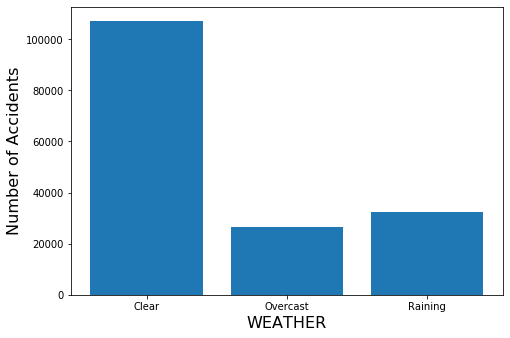

In [9]:
#create a weather count bar chart
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bars = ["Clear", "Overcast", "Raining"]
counts = [count("WEATHER", "Clear"), count("WEATHER", "Overcast"), count("WEATHER", "Raining")]
ax.bar(bars, counts)

plt.xlabel('WEATHER', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)

plt.show()
#more accidents occur when the skys are clear, but this could easily be because of an unbalanced dataset. Lets not use count.

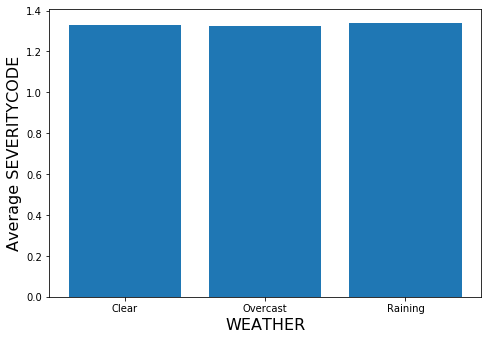

In [10]:
#create a weather mean bar chart
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bars = ["Clear", "Overcast", "Raining"]
counts = [average("WEATHER", "Clear"), average("WEATHER", "Overcast"), average("WEATHER", "Raining")]
ax.bar(bars, counts)

plt.xlabel('WEATHER', fontsize=16)
plt.ylabel('Average SEVERITYCODE', fontsize=16)

plt.show()
#there is slightly more accidents when it's raining

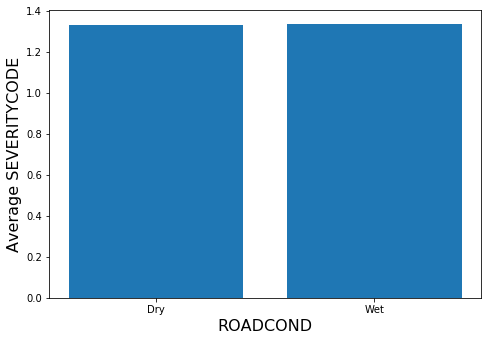

In [11]:
#create a road condition mean bar chart
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bars = ["Dry", "Wet"]
counts = [average("ROADCOND", "Dry"), average("ROADCOND", "Wet")]
ax.bar(bars, counts)

plt.xlabel('ROADCOND', fontsize=16)
plt.ylabel('Average SEVERITYCODE', fontsize=16)

plt.show()
#road road condition doesn't seem to have much significance

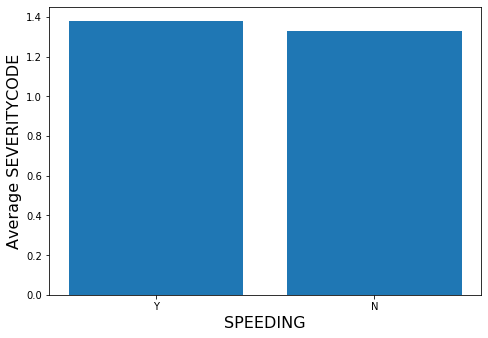

In [12]:
#create a speeding mean bar chart
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bars = ["Y", "N"]
counts = [average("SPEEDING", "Y"), average("SPEEDING", "N")]
ax.bar(bars, counts)

plt.xlabel('SPEEDING', fontsize=16)
plt.ylabel('Average SEVERITYCODE', fontsize=16)

plt.show()
#Aha! Speeding increases the severity of the accident by a noticable amount.

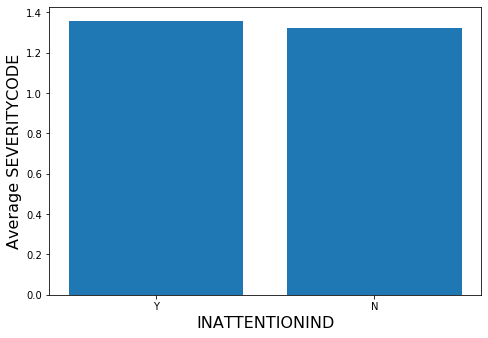

In [13]:
#create a inattention mean bar chart
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bars = ["Y", "N"]
counts = [average("INATTENTIONIND", "Y"), average("INATTENTIONIND", "N")]
ax.bar(bars, counts)

plt.xlabel('INATTENTIONIND', fontsize=16)
plt.ylabel('Average SEVERITYCODE', fontsize=16)

plt.show()
#Inattention also increases the severity of the accident by a noticable (but smaller) amount.

#next steps, only include columns that have a significance of the rating in the dataframe

In [14]:
#dfClean['SEVERITYCODE'].value_counts()
#df['SEVERITYCODE'].value_counts()
#there seems to be only two values in here for the severity code rather than the 5 in the documentation

#prepare the data more
dfClean[["INATTENTIONIND"]] = dfClean[["INATTENTIONIND"]].replace(['Y', 'N'], [1, 0])
#dfClean["ROADCOND"] = dfClean["ROADCOND"].replace(['Wet', 'Dry'], [1, 0])
dfClean["SPEEDING"] = dfClean["SPEEDING"].replace(['Y', 'N'], [1, 0])
dfClean.head()

,SEVERITYCODE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,At Intersection (intersection related),0,Overcast,Wet,Daylight,0
1,1,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,0
2,1,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,0
3,1,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,0
4,2,At Intersection (intersection related),0,Raining,Wet,Daylight,0


In [15]:
#preprocess the data for classification. we want to turn these values into numbers, so use one hot encoding on all values
#function to hot encode
def encode_and_concat(df, feature):
    dummies = pd.get_dummies(df[[feature]])
    new = pd.concat([df, dummies], axis = 1)
    return new
#encode these features
dfEncode = encode_and_concat(dfClean, 'JUNCTIONTYPE')
dfEncode = encode_and_concat(dfClean, 'WEATHER')
dfEncode = encode_and_concat(dfClean, 'ROADCOND')
dfEncode = encode_and_concat(dfClean, 'LIGHTCOND')

#drop old old columns
dfEncode.drop('JUNCTIONTYPE', axis = 1, inplace=True)
dfEncode.drop('WEATHER', axis = 1, inplace=True)
dfEncode.drop('ROADCOND', axis = 1, inplace=True)
dfEncode.drop('LIGHTCOND', axis = 1, inplace=True)

dfEncode.head()

,SEVERITYCODE,INATTENTIONIND,SPEEDING,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other
0,2,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,0,0,0,0,0,1,0,0


In [16]:
feature_df = dfEncode[['INATTENTIONIND', 'SPEEDING', 
                       'LIGHTCOND_Dark - No Street Lights',
                       'LIGHTCOND_Dark - Street Lights Off',
                       'LIGHTCOND_Dark - Street Lights On',
                       'LIGHTCOND_Dark - Unknown Lighting', 
                       'LIGHTCOND_Dawn', 'LIGHTCOND_Daylight', 
                       'LIGHTCOND_Dusk', 'LIGHTCOND_Other']]
#X = np.asarray(feature_df)
X= preprocessing.StandardScaler().fit(feature_df).transform(feature_df)
X[0:5]

array([[-0.45044411, -0.23850372, -0.09027377, -0.08081202, -0.61538371,
        -0.00731951, -0.11995366,  0.71418362, -0.18526783, -0.03320277],
       [-0.45044411, -0.23850372, -0.09027377, -0.08081202,  1.6250024 ,
        -0.00731951, -0.11995366, -1.40020013, -0.18526783, -0.03320277],
       [-0.45044411, -0.23850372, -0.09027377, -0.08081202, -0.61538371,
        -0.00731951, -0.11995366,  0.71418362, -0.18526783, -0.03320277],
       [-0.45044411, -0.23850372, -0.09027377, -0.08081202, -0.61538371,
        -0.00731951, -0.11995366,  0.71418362, -0.18526783, -0.03320277],
       [-0.45044411, -0.23850372, -0.09027377, -0.08081202, -0.61538371,
        -0.00731951, -0.11995366,  0.71418362, -0.18526783, -0.03320277]])

In [17]:
y = dfEncode['SEVERITYCODE'].values
#y = np.asarray(dfEncode['SEVERITYCODE'])
#y [0:5]
#dfEncode.shape

In [18]:
#test and train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (134397, 10) (134397,)
Test set: (33600, 10) (33600,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [30]:
#KNN
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.43247024, 0.45002976, 0.43779762, 0.60794643, 0.60744048,
       0.64306548, 0.52255952, 0.56708333, 0.53604167])

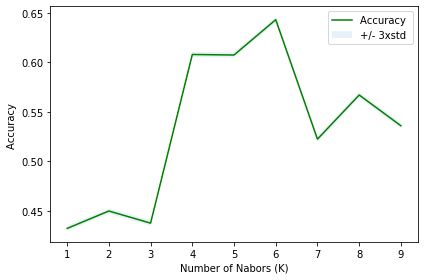

The best accuracy was with 0.6430654761904762 with k= 6


In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
#k = 6 is best fit

In [22]:
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)

In [23]:
#Evaluation
from sklearn.metrics import f1_score
#f1_score(y_test, yhat, average='weighted') 

from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_test, yhat)

knn_result = neigh.predict(X_test)
print("KNN's Jaccard:", jaccard_similarity_score(y_test, knn_result))
print("KNN's F1 Score:", f1_score(y_test, knn_result, average='weighted'))

KNN's Jaccard: 0.6430654761904762
KNN's F1 Score: 0.5535452215572196


C:\Users\cpche\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
#Decision Tree
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
carTree.fit(X_train, y_train)
predTree = carTree.predict(X_test)

In [26]:
print("DecisionTrees's Jaccard:", jaccard_similarity_score(y_test, predTree))
print("DecisionTrees's F1 Score:", f1_score(y_test, predTree, average='weighted'))

DecisionTrees's Jaccard: 0.6658035714285714
DecisionTrees's F1 Score: 0.5322288934065346


C:\Users\cpche\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\cpche\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [28]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [29]:
print("Logistic Regression's Jaccard:", jaccard_similarity_score(y_test, yhat))
print("Logistic Regression's F1 Score:", f1_score(y_test, yhat, average='weighted'))
print("Logistic Regression's Log Loss:", log_loss(y_test, yhat_prob))

Logistic Regression's Jaccard: 0.6658035714285714
Logistic Regression's F1 Score: 0.5322288934065346
Logistic Regression's Log Loss: 0.6352971133324362


C:\Users\cpche\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\cpche\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
